In [2]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd
import numpy as np
from collections import Counter
from plotnine import ggplot, aes, geom_bar, coord_flip, labs, theme_classic, scale_y_continuous, scale_color_discrete, guides, geom_col, scale_fill_manual 

/home/djl294/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


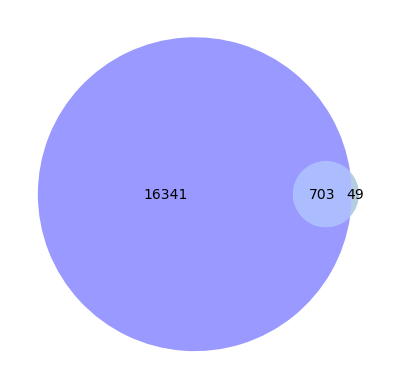

In [18]:
def read_identifiers(file):
    with open(file, 'r') as f:
        lis = []
        lines = f.readlines()
        for line in lines:
            identifier = line.strip()
            lis.append(identifier)
        return set(lis)
        


# Read identifiers from the two files
fs_identifiers = read_identifiers("FS_tacc.u") # Target accessions of foldseekk hits (after quality filtering)
hmmer_identifiers = read_identifiers("HMMER_tacc.u")# Target accessions of hmmer hits (after quality filtering)


# Create a Venn diagram
venn2([fs_identifiers, hmmer_identifiers], ('', ''), set_colors=("Blue", "steelblue"))


# Display the plot
plt.title("")
plt.savefig("Foldseek_HMMER_venn.svg")
plt.show()

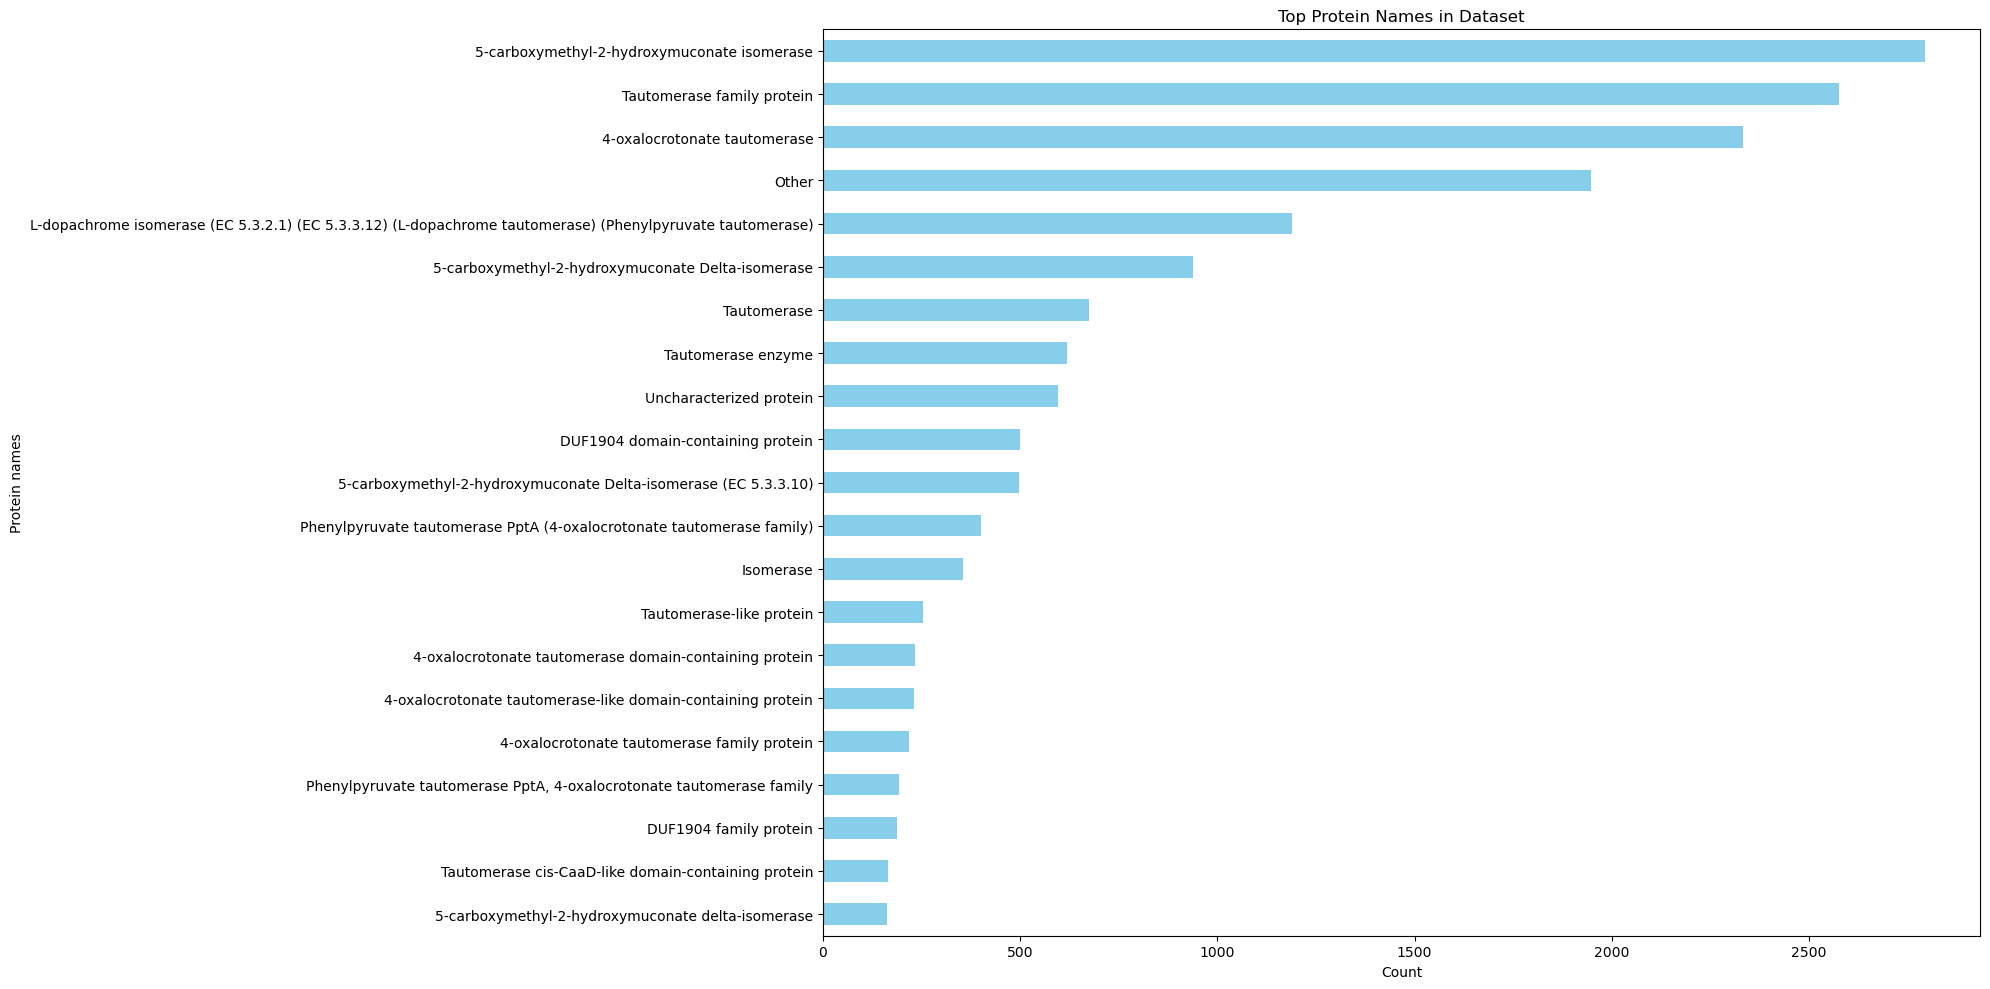

Protein names
5-carboxymethyl-2-hydroxymuconate isomerase                                                                  2794
Tautomerase family protein                                                                                   2577
4-oxalocrotonate tautomerase                                                                                 2332
L-dopachrome isomerase (EC 5.3.2.1) (EC 5.3.3.12) (L-dopachrome tautomerase) (Phenylpyruvate tautomerase)    1189
5-carboxymethyl-2-hydroxymuconate Delta-isomerase                                                             938
Tautomerase                                                                                                   675
Tautomerase enzyme                                                                                            618
Uncharacterized protein                                                                                       597
DUF1904 domain-containing protein                                         

In [26]:

# Load data
names = pd.read_csv("combined_uniprot_protnames", sep="\t")

# Count occurrences of each protein name
protein_counts = names['Protein names'].value_counts()

# Optional: Limit to top N to avoid clutter
top_n = 20
protein_counts_top = protein_counts.nlargest(top_n)
other_count = protein_counts.iloc[top_n:].sum()
protein_counts_top['Other'] = other_count

# Plot horizontal bar chart
plt.figure(figsize=(20, 10))
protein_counts_top.sort_values().plot.barh(color='skyblue')  # sort for visual clarity

plt.xlabel("Count")
plt.title("Top Protein Names in Dataset")
plt.tight_layout()
plt.show()

print(protein_counts_top)

